In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 

In [2]:
train_set = pd.read_csv('MNIST/mnist_train.csv').values
test_set  = pd.read_csv('MNIST/mnist_test.csv').values

In [76]:
# Importing datasets and separating the labels  
x_train = train_set[:,1:]
y_train = train_set[:,:1]

x_test = test_set[:,1:]
y_test = test_set[:,:1]

In [77]:
# Reshaping the dataset 
x_train = np.reshape(x_train,(60000,28,28,1))
x_train = x_train/255.

x_test = np.reshape(x_test,(10000,28,28,1))
x_test = x_test/255.

# CNN Architecture modeling

In [6]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3), input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



In [7]:
model.fit(x = x_train, y = y_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 57s 28ms/step - loss: 0.2073 - accuracy: 0.9373
Epoch 2/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 3/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0585 - accuracy: 0.9812
Epoch 4/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0441 - accuracy: 0.9863
Epoch 5/8
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0377 - accuracy: 0.9874
Epoch 6/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0288 - accuracy: 0.9901
Epoch 7/8
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0253 - accuracy: 0.9912TA: 23s - loss: 0.02 - ETA: 23s - loss: 0.0248 - accuracy:  - ETA: 23s - loss: 0. - ETA - ETA: 23s - loss: - ETA: 22s - loss: 0.0246 -  - ETA: - ETA: 19s - loss: 0.0244 - a - ETA - ETA: 15s - loss: 0.0248 - accuracy: 0. - ETA: 15s - loss: 0.0249 - accuracy - ETA: 15s - loss: 0.0 

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.0578 - accuracy: 0.9847


[0.057771649211645126, 0.9847000241279602]

# Importing test image and preprocessing 

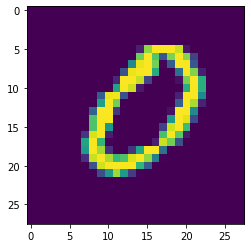

This image is predicted as : 0


In [72]:
# Preprocessing the image
img = cv.imread('Test/Zero.png')                       
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = gray/255.
gray = 1.-gray
gray = cv.resize(gray,(28,28))


plt.imshow(gray)
plt.show()

# Reshaping image to predict
gray = np.reshape(gray, (1,28,28,1))
print("This image is predicted as :" , np.argmax(model.predict(gray)))       # np.argmax returns index of max value 

In [73]:
ref = 0
result = model.predict(gray)
for i in result[0]:
  
    print(i ,  ref)
    ref = ref + 1

0.999793 0
7.672761e-08 1
0.00010775066 2
7.557145e-09 3
5.4632636e-08 4
1.9213199e-11 5
8.230964e-06 6
1.5817881e-06 7
5.8404247e-08 8
8.933644e-05 9


In [74]:
np.argmax(result)

0

# Saving the CNN model 

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [80]:
model.save('CNN_8Epochs.h5')         # After saving the model load the model with load_model in keras.model lib   